### Metas deste Notebook

- Particionar teste e treino
- Treinar modelos
- Avaliar modelos
- Utilizar Matriz de Confusão

In [4]:
import pandas as pd 
import numpy as np

In [10]:
data = pd.read_csv('ignores/feature_selection.csv')

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(data.iloc[:,:-1], data.iloc[:, -1])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
label = np.arange(1,56)

In [29]:
data = pd.read_csv('ignores/covtype.data', names=label, index_col=None)

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test , y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.3,random_state=40)

In [39]:
model = DecisionTreeClassifier()

model.fit(x_train,y_train)

prediction = model.predict(data.iloc[:,:-1])

print(model.score(x_test,y_test))

0.93429869653


In [49]:
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt

In [44]:
confu = confusion_matrix(data.iloc[:,-1], prediction)

In [55]:
print(confu)

[[207552   3886     12      0     62     11    317]
 [  3781 278674    241      1    401    167     36]
 [     4    224  34973    100     35    418      0]
 [     0      0    105   2603      0     39      0]
 [    57    405     32      0   8983     15      1]
 [    17    207    456     48     12  16627      0]
 [   317     44      0      0      1      0  20148]]


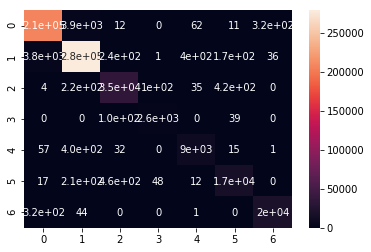

In [54]:
seaborn.heatmap(confu, annot=True)
plt.show()